In [1]:
# Step 1: Load & Quick Checks

import pandas as pd

# Path to your dataset (Kaggle mount)
file_path = "/kaggle/input/medical-insurance-cost-dataset/insurance.csv"

# Load dataset
df = pd.read_csv(file_path)

# Show basic info
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (1338, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Exploratory Data Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


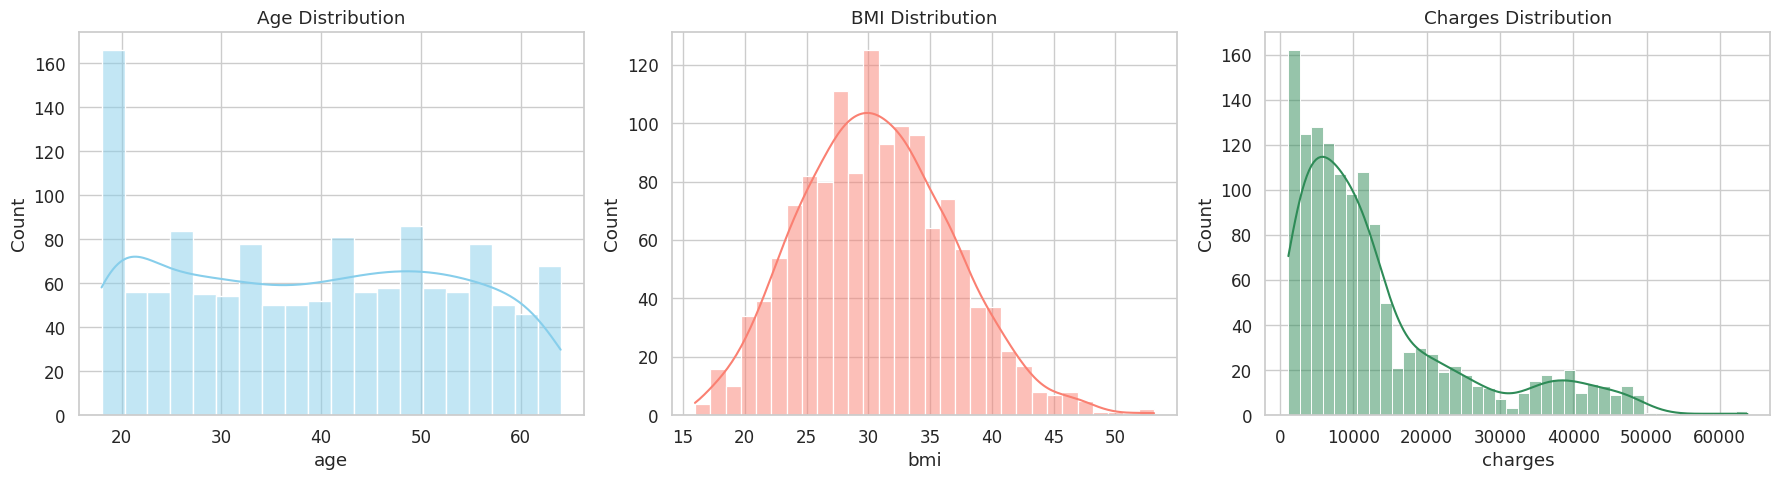

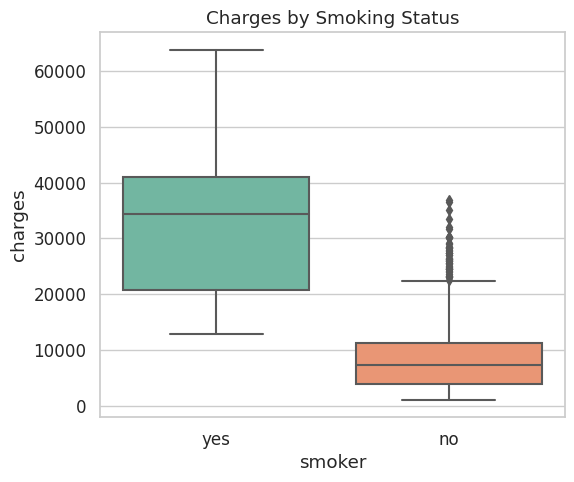

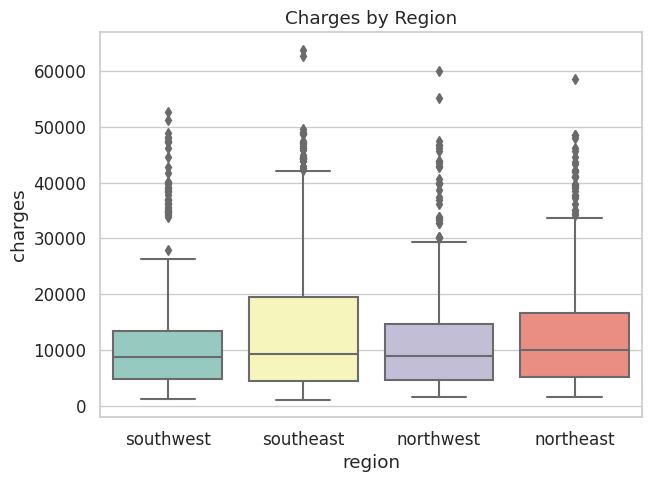

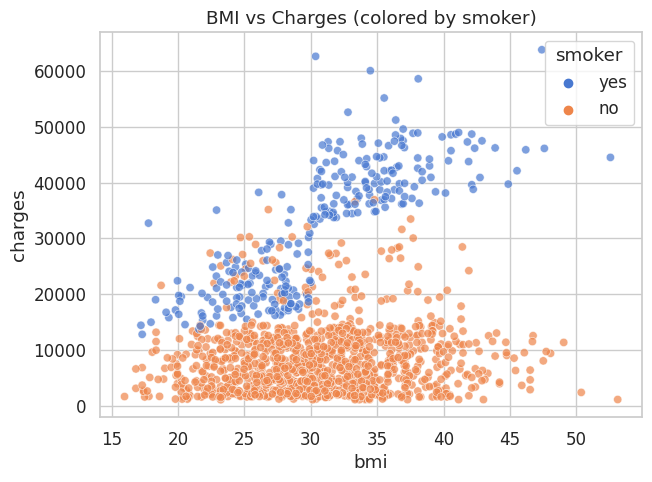

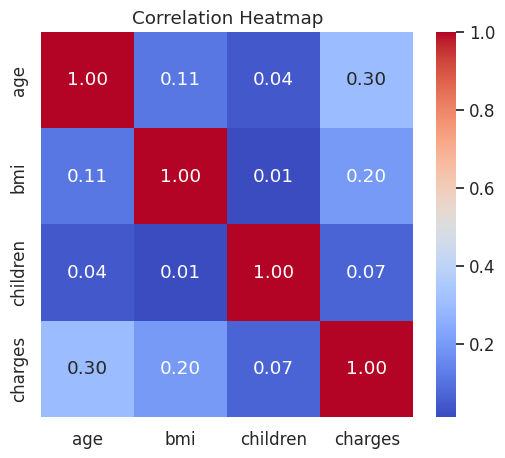

In [2]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Age Distribution")

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("BMI Distribution")

sns.histplot(df['charges'], bins=40, kde=True, ax=axes[2], color="seagreen")
axes[2].set_title("Charges Distribution")

plt.tight_layout()
plt.show()

# 2. Boxplot: charges by smoker
plt.figure(figsize=(6, 5))
sns.boxplot(x="smoker", y="charges", data=df, palette="Set2")
plt.title("Charges by Smoking Status")
plt.show()

# 3. Boxplot: charges by region
plt.figure(figsize=(7, 5))
sns.boxplot(x="region", y="charges", data=df, palette="Set3")
plt.title("Charges by Region")
plt.show()

# 4. Scatterplot: BMI vs Charges
plt.figure(figsize=(7, 5))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("BMI vs Charges (colored by smoker)")
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(6,5))
corr = df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Preprocessing And Feature Engineering

In [3]:
# Step 3: Preprocessing & Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Add a new feature: Obesity flag
df['is_obese'] = (df['bmi'] >= 30).astype(int)

# 2. Define features and target
TARGET = 'charges'
NUM_FEATURES = ['age', 'bmi', 'children', 'is_obese']
CAT_FEATURES = ['sex', 'smoker', 'region']

X = df[NUM_FEATURES + CAT_FEATURES]
y = df[TARGET]

# 3. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# 4. Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUM_FEATURES),
        ("cat", categorical_transformer, CAT_FEATURES)
    ]
)

print("✅ Preprocessing pipeline created")


Train shape: (1070, 7)
Test shape: (268, 7)
✅ Preprocessing pipeline created


# Baseline Modeling

In [4]:
# Step 4: Baseline Modeling (Linear Regression)

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Create pipeline: Preprocessing + Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 2. Train the model
lr_pipeline.fit(X_train, y_train)

# 3. Make predictions
y_pred_train = lr_pipeline.predict(X_train)
y_pred_test = lr_pipeline.predict(X_test)

# 4. Evaluate model performance
def evaluate_model(y_true, y_pred, dataset="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} -- MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

print("Linear Regression Performance:\n")
evaluate_model(y_train, y_pred_train, "Train")
evaluate_model(y_test, y_pred_test, "Test")


Linear Regression Performance:

Train -- MAE: 4249.44, RMSE: 6028.85, R2: 0.7482
Test -- MAE: 4290.59, RMSE: 5809.37, R2: 0.7826


# Advance models

In [5]:
# Step 5: Advanced Models (Random Forest + XGBoost)

from sklearn.ensemble import RandomForestRegressor

# ----------------------
# 1. Random Forest
# ----------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf, "Test")

# ----------------------
# 2. Optional: XGBoost (if installed)
# ----------------------
try:
    import xgboost as xgb

    xgb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=1
        ))
    ])

    xgb_pipeline.fit(X_train, y_train)
    y_pred_xgb = xgb_pipeline.predict(X_test)

    print("\nXGBoost Performance:")
    evaluate_model(y_test, y_pred_xgb, "Test")

except ModuleNotFoundError:
    print("\nXGBoost not installed in this environment. Skipping XGBoost.")


Random Forest Performance:
Test -- MAE: 2552.68, RMSE: 4644.50, R2: 0.8611

XGBoost Performance:
Test -- MAE: 2484.07, RMSE: 4617.97, R2: 0.8626


# Hyperparameter Tuning

In [6]:
# Step 6: Hyperparameter Tuning (Random Forest)

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'regressor__n_estimators': [100, 200, 400, 600],
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Create pipeline (preprocessor + RF)
rf_tune_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Randomized search with 3-fold CV
search = RandomizedSearchCV(
    rf_tune_pipeline,
    param_distributions=param_dist,
    n_iter=10,  # number of parameter settings sampled
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit search
search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:")
print(search.best_params_)

# Evaluate tuned model
best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nTuned Random Forest Performance:")
evaluate_model(y_test, y_pred_best, "Test")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters:
{'regressor__n_estimators': 400, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'log2', 'regressor__max_depth': None}

Tuned Random Forest Performance:
Test -- MAE: 2653.12, RMSE: 4582.37, R2: 0.8647


# Feature Importance & SHAP

Top 10 Feature Importances:
            feature  importance
0        smoker_yes    0.340319
1         smoker_no    0.326475
2               age    0.125225
3               bmi    0.102996
4          is_obese    0.059356
5          children    0.019367
6  region_southeast    0.005340
7  region_northeast    0.004687
8          sex_male    0.004255
9        sex_female    0.004143


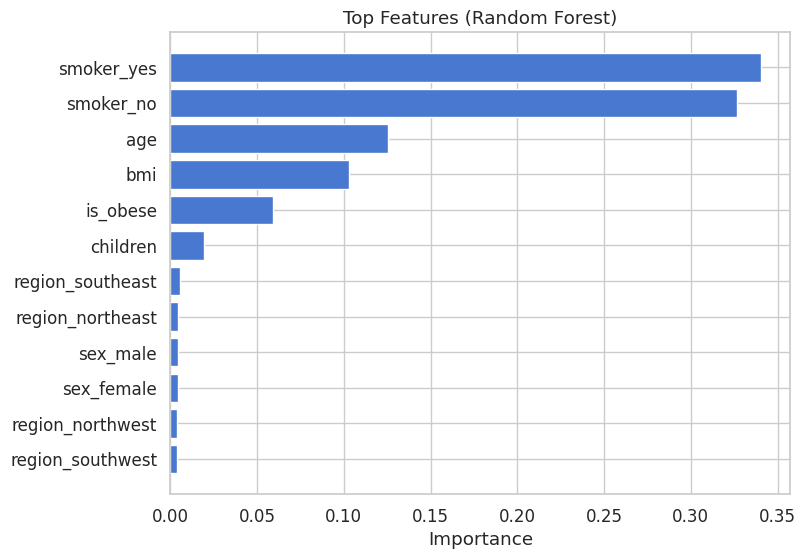


Running SHAP analysis (may take a few minutes)...


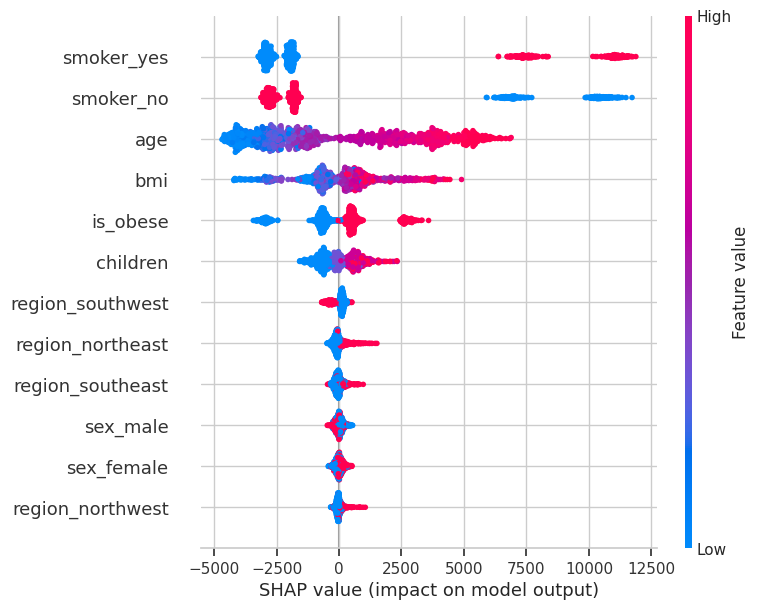

In [7]:
# Step 7: Model Interpretation & Feature Importance

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract feature names after preprocessing
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_cols = list(ohe.get_feature_names_out(CAT_FEATURES))
all_feature_names = NUM_FEATURES + cat_cols

# 2. Feature importances from Random Forest
importances = best_model.named_steps['regressor'].feature_importances_
fi_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
fi_df = fi_df.sort_values('importance', ascending=False).reset_index(drop=True)

print("Top 10 Feature Importances:")
print(fi_df.head(10))

# 3. Plot top 15 features
plt.figure(figsize=(8,6))
plt.barh(fi_df['feature'][:15][::-1], fi_df['importance'][:15][::-1])
plt.title("Top Features (Random Forest)")
plt.xlabel("Importance")
plt.show()

# 4. Optional: SHAP explainability (if installed)
try:
    import shap
    print("\nRunning SHAP analysis (may take a few minutes)...")
    
    X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)
    reg = best_model.named_steps['regressor']
    
    explainer = shap.TreeExplainer(reg)
    shap_values = explainer.shap_values(X_train_transformed)
    
    shap.summary_plot(shap_values, X_train_transformed, feature_names=all_feature_names, show=True)
    
except ModuleNotFoundError:
    print("SHAP not installed. Skipping SHAP plots.")


# Final Evaluation & Error Analysis

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


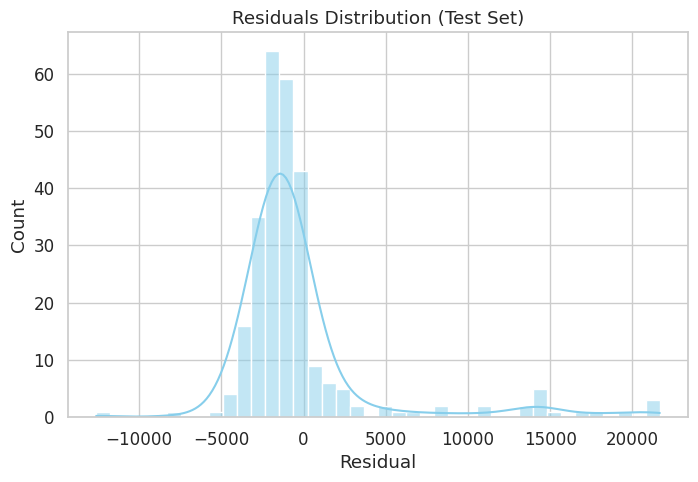

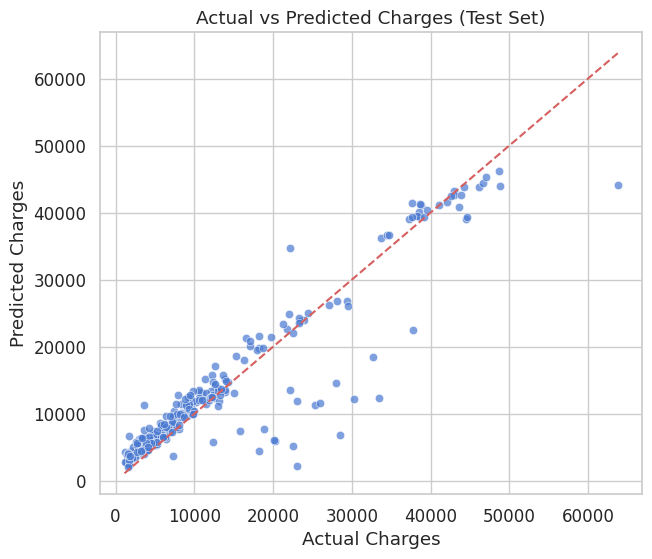


MAE by Smoker Status:
smoker
no     2599.122704
yes    2867.094686
Name: residual, dtype: float64

MAE by Region:
region
northeast    2784.467562
northwest    2674.357829
southeast    2466.594640
southwest    2754.030567
Name: residual, dtype: float64


In [8]:
# Step 8: Final Evaluation & Error Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Predict on train and test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 2. Residuals
residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=40, kde=True, color='skyblue')
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

# 3. Predicted vs Actual
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Test Set)")
plt.show()

# 4. Error Analysis by Subgroups
df_test = X_test.copy()
df_test['actual'] = y_test
df_test['predicted'] = y_pred_test
df_test['residual'] = residuals

# Mean Absolute Error by smoker status
mae_by_smoker = df_test.groupby('smoker')['residual'].apply(lambda x: np.mean(np.abs(x)))
print("\nMAE by Smoker Status:")
print(mae_by_smoker)

# Mean Absolute Error by region
mae_by_region = df_test.groupby('region')['residual'].apply(lambda x: np.mean(np.abs(x)))
print("\nMAE by Region:")
print(mae_by_region)

# 5. Observation:
# - Check if errors are larger for smokers with high charges.
# - Check if residuals show any pattern (e.g., non-random -> consider further feature engineering)


# Save Model & Streamlit Snippet

In [9]:
# Step 9: Save & Deploy

import joblib
import pandas as pd

# 1. Save the best model (includes preprocessing)
MODEL_FILE = "best_insurance_model.pkl"
joblib.dump(best_model, MODEL_FILE)
print(f"Model saved as {MODEL_FILE}")

# 2. Save feature importance (optional)
ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_cols = list(ohe.get_feature_names_out(CAT_FEATURES))
all_feature_names = NUM_FEATURES + cat_cols
importances = best_model.named_steps['regressor'].feature_importances_
fi_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
fi_df.to_csv("feature_importances.csv", index=False)
print("Feature importances saved as feature_importances.csv")

# 3. Minimal Streamlit demo (save as streamlit_app.py)
streamlit_code = """
# streamlit_app.py
# Run with: streamlit run streamlit_app.py

import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('best_insurance_model.pkl')

st.title('Insurance Charges Prediction')

# Input fields
age = st.number_input('Age', 0, 120, 35)
sex = st.selectbox('Sex', ['male', 'female'])
bmi = st.number_input('BMI', 10.0, 60.0, 27.5)
children = st.number_input('Children', 0, 10, 0)
smoker = st.selectbox('Smoker', ['yes', 'no'])
region = st.selectbox('Region', ['northeast','northwest','southeast','southwest'])

# Derived feature
is_obese = int(bmi >= 30)

# Prepare dataframe
input_df = pd.DataFrame([{
    'age': age,
    'bmi': bmi,
    'children': children,
    'is_obese': is_obese,
    'sex': sex,
    'smoker': smoker,
    'region': region
}])

# Predict button
if st.button('Predict'):
    pred = model.predict(input_df)[0]
    st.success(f'Predicted Insurance Charges: ${pred:,.2f}')
"""

with open("streamlit_app.py", "w") as f:
    f.write(streamlit_code)

print("Streamlit demo saved as streamlit_app.py")


Model saved as best_insurance_model.pkl
Feature importances saved as feature_importances.csv
Streamlit demo saved as streamlit_app.py


In [10]:
with open("streamlit_app.py", "w") as f:
    f.write(""" 
# Paste the Streamlit code here exactly as in Step 9 
""")


In [11]:
import sklearn
print(sklearn.__version__)


1.2.2
